Explicit Finite Differences for European Call Option

In [ ]:
    #Explicit Finite Differences
    import math
    import sys
    import matplotlib.pyplot as plt
    import numpy as np

In [ ]:
np.set_printoptions(precision=5)
np.random.seed(10)
NbScenarios = 1000
K = 21
S0 = 20
r = 0.12
T = 0.1
m = 10  # number of time steps
n = 10  # number of underlying steps
dt = T / m
dS = 2
f = np.zeros((m + 1, 2 * n + 2))
a = np.zeros(2 * n + 2)
b = np.zeros(2 * n + 2)
c = np.zeros(2 * n + 2)
D = 1 / (1 + r * dt)


In [ ]:
for j in range(0, 2 * n + 1, 1):
    f[m][j] = max(0, j * dS - K)
    sigma = 0.2 * (1 + math.exp(-0.5 * j * dS))
    a[j] = D  # Assuming D should be assigned to a[j]
    b[j] = D  # Assuming D should be assigned to b[j]
    c[j] = D  # Assuming D should be assigned to c[j]
for i in range(m - 1, -1, -1):  # Corrected indentation
    for j in range(0, 2 * m, 1):  # Assuming the range should be up to 2*m
        f[i][j] = a[j] * f[i + 1][j - 1] + b[j] * f[i + 1][j] + c[j] * f[i + 1][j + 1]
print(f[0][10])

NbScenarios = 1000
S = np.zeros((m + 1, NbScenarios))
Vest = 0
for Scenario in range(1, NbScenarios):
    S[0][Scenario] = S0
    for i in range(1, m + 1):
        sigma = 0.2 * (1 + math.exp(-0.5 * j * dS))  # Assuming "j" from the outer loop was intended
        z = np.random.normal()  # Assuming you intended to use a normal random variable
        S[i][Scenario] = S[i - 1][Scenario] * math.exp(
            (r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * z
        )  # Replace "..." with your intended calculation
    Vest = Vest + max(S[m][Scenario] - K, 0)
Vest = Vest / NbScenarios
print(Vest)

94729.0927573663
0.223156013618697


In [ ]:
D

0.998801438274071

In [ ]:
a

array([ 0.     , -0.00023, -0.00017,  0.00018,  0.00092,  0.00207,
        0.00363,  0.00561,  0.008  ,  0.01079,  0.01399,  0.01758,
        0.02157,  0.02597,  0.03076,  0.03596,  0.04155,  0.04754,
        0.05394,  0.06073,  0.06792,  0.     ])

In [ ]:
b

array([0.9988 , 0.99805, 0.99674, 0.99484, 0.99217, 0.98868, 0.98435,
       0.97919, 0.97321, 0.96643, 0.95885, 0.95046, 0.94127, 0.93128,
       0.9205 , 0.90891, 0.89652, 0.88334, 0.86936, 0.85457, 0.83899,
       0.     ])

In [ ]:
c

array([0.     , 0.00097, 0.00223, 0.00378, 0.00571, 0.00806, 0.01082,
       0.014  , 0.01759, 0.02158, 0.02597, 0.03076, 0.03596, 0.04155,
       0.04754, 0.05394, 0.06073, 0.06792, 0.07551, 0.0835 , 0.09189,
       0.     ])

94729.0927573663
0.22317551076007053


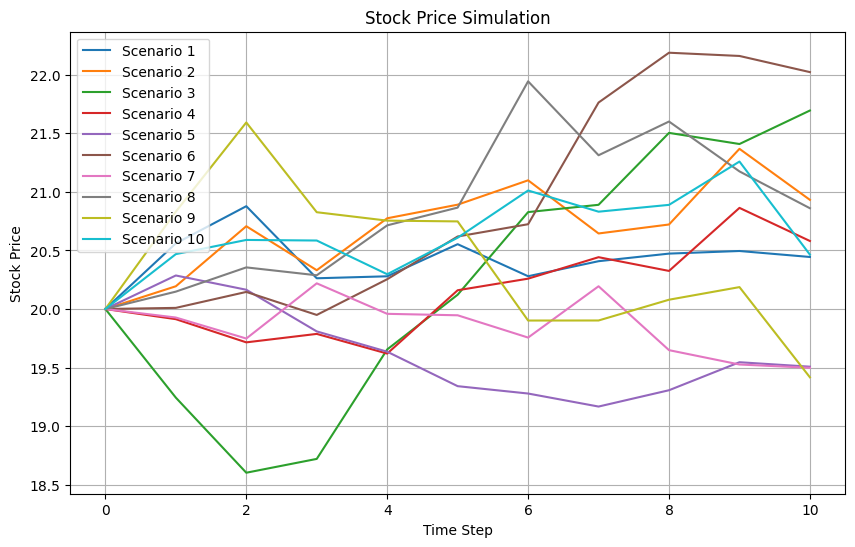

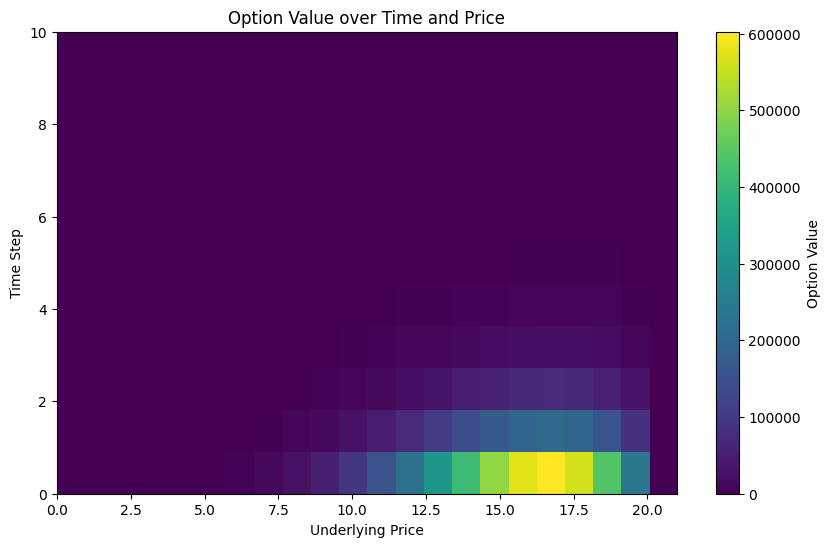

In [ ]:
# prompt: help me visualize my results

import math
import sys
import matplotlib.pyplot as plt
import numpy as np

# Explicit Finite Differences
np.set_printoptions(precision=5)
np.random.seed(10)
NbScenarios = 1000
K = 21
S0 = 20
r = 0.12
T = 0.1
m = 10  # number of time steps
n = 10  # number of underlying steps
dt = T / m
dS = 2
f = np.zeros((m + 1, 2 * n + 2))
a = np.zeros(2 * n + 2)
b = np.zeros(2 * n + 2)
c = np.zeros(2 * n + 2)
D = 1 / (1 + r * dt)

for j in range(0, 2 * n + 1, 1):
    f[m][j] = max(0, j * dS - K)
    sigma = 0.2 * (1 + math.exp(-0.5 * j * dS))
    a[j] = D  # Assuming D should be assigned to a[j]
    b[j] = D  # Assuming D should be assigned to b[j]
    c[j] = D  # Assuming D should be assigned to c[j]
for i in range(m - 1, -1, -1):  # Corrected indentation
    for j in range(0, 2 * n + 1, 1):  # Assuming the range should be up to 2*n +1
        f[i][j] = a[j] * f[i + 1][j - 1] + b[j] * f[i + 1][j] + c[j] * f[i + 1][j + 1]
print(f[0][10])

NbScenarios = 1000
S = np.zeros((m + 1, NbScenarios))
Vest = 0
for Scenario in range(0, NbScenarios): #Start from 0
    S[0][Scenario] = S0
    for i in range(1, m + 1):
        sigma = 0.2 * (1 + math.exp(-0.5 * 10 * dS))  # Fixed j to a constant value (10) for demonstration
        z = np.random.normal()
        S[i][Scenario] = S[i - 1][Scenario] * math.exp(
            (r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * z
        )
    Vest = Vest + max(S[m][Scenario] - K, 0)
Vest = Vest / NbScenarios
print(Vest)


# Visualization
plt.figure(figsize=(10, 6))
for i in range(min(NbScenarios, 10)):  # Plot a limited number of scenarios for clarity
    plt.plot(S[:, i], label=f"Scenario {i+1}")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.title("Stock Price Simulation")
plt.legend()
plt.grid(True)
plt.show()

#Plot f
plt.figure(figsize=(10,6))
plt.imshow(f, cmap='viridis', aspect='auto', origin='lower', extent=[0, 2 * n + 1, 0, m])
plt.colorbar(label='Option Value')
plt.xlabel('Underlying Price')
plt.ylabel('Time Step')
plt.title('Option Value over Time and Price')
plt.show()


Final Solution

In [1]:
import numpy as np
import math

np.set_printoptions(precision=5)
np.random.seed(10)

# -----------------------------
# Model and Grid Parameters
# -----------------------------
NbScenarios = 1000  # (Used in a possible Monte Carlo, not used here)
K  = 21
S0 = 20
r  = 0.12
T  = 0.1
m  = 10             # number of time steps
n  = 10             # number of underlying-price steps (on each side)
dt = T / m
dS = 2.0
sigma = 0.2         # volatility

# We have a grid in S of size (2n+2).
# j runs from 0 to 2n+1 inclusive.
M = m
Jmax = 2*n + 1

# -----------------------------
# Storage for option values
# f[i,j] = option value at time i and stock index j
# i goes 0..m, j goes 0..2n+1
# i=0 means t=0 (today), i=m means t=T (maturity).
# We'll fill f[m,:] from the payoff, then step backward.
# -----------------------------
f = np.zeros((M + 1, Jmax + 1))

# -----------------------------
# Boundary Conditions at Maturity
# f[m,j] = payoff( S_j ), where S_j = j * dS
# For a CALL: payoff = max(S_j - K, 0)
# -----------------------------
for j in range(Jmax + 1):
    S_j = j * dS
    f[M, j] = max(S_j - K, 0.0)

# -----------------------------
# Trinomial Probabilities
# We define them “on the fly” at each j.
# A common choice for an explicit scheme:
#   p_up(j)   = λ_j + μ_j
#   p_down(j) = λ_j - μ_j
#   p_mid(j)  = 1 - 2λ_j
# where
#   λ_j = 0.5 * sigma^2 * (j^2) * dt
#   μ_j = 0.5 * r * j * dt
# Then
#   f[i,j] = exp(-r dt)[ p_down f[i+1, j-1] + p_mid f[i+1, j] + p_up f[i+1, j+1] ]
# Important: handle j=0 and j=Jmax carefully (boundary).
# -----------------------------

def p_down(j):
    """ p_down = λ_j - μ_j """
    lam = 0.5 * sigma**2 * (j**2) * dt
    mu  = 0.5 * r * j * dt
    return lam - mu

def p_up(j):
    """ p_up = λ_j + μ_j """
    lam = 0.5 * sigma**2 * (j**2) * dt
    mu  = 0.5 * r * j * dt
    return lam + mu

def p_mid(j):
    """ p_mid = 1 - 2λ_j """
    lam = 0.5 * sigma**2 * (j**2) * dt
    return 1.0 - 2.0 * lam

discount = math.exp(-r * dt)  # We multiply by this each step.

# -----------------------------
# Step back in time (explicit Euler)
# For each i = m-1 down to 0:
#   for each j = 1..Jmax-1:
#       f[i,j] = discount * (p_down(j)*f[i+1,j-1] + p_mid(j)*f[i+1,j] + p_up(j)*f[i+1,j+1])
#
# We'll impose boundary conditions:
#   j=0 => f[i,0] = payoff if S=0 => call payoff = max(0-K,0)=0
#   j=Jmax => S_{max} = (2n+1)*dS; for a large grid, we can treat call ~ S-K
#             or just use the formula same as interior if no out-of-bounds.
# -----------------------------

for i in range(M-1, -1, -1):
    # handle j=0 boundary
    f[i,0] = 0.0  # For a call, value is 0 if S=0

    for j in range(1, Jmax):
        pu = p_up(j)
        pd = p_down(j)
        pm = p_mid(j)

        # Could fall out of [0, Jmax] if j=0 or j=Jmax, so watch out.
        # But here, we do j in [1, Jmax-1], so j±1 are in [0,Jmax].
        f[i,j] = discount * (
            pd * f[i+1,j-1] +
            pm * f[i+1,j]   +
            pu * f[i+1,j+1]
        )

    # handle j=Jmax boundary
    # Let's approximate f[i, Jmax]:
    #   Could either do "intrinsic" (S-K e^{-r(T - t_i)})
    #   or reuse the same formula with caution about j+1 out of range.
    # A simple approach:
    #   We can treat f[i, Jmax+1] ~ f[i, Jmax], i.e. ignore beyond boundary,
    #   or set f[i+1, Jmax+1] = S_{max} - K (the in-the-money extension).
    # For simplicity, let's do a "linear extension" trick:

    # We'll pretend f[i+1, Jmax+1] = f[i+1, Jmax] + (f[i+1, Jmax] - f[i+1, Jmax-1]).
    # Or just do an approximate intrinsic boundary:
    S_max = Jmax * dS
    f[i, Jmax] = S_max - K * math.exp(-r * (M - i) * dt)  # approximate

# -----------------------------
# We want f[0, j0], where j0 ~ S0/dS
# -----------------------------
j0 = int(S0 // dS)  # floor
# If you'd like a small interpolation, you can do that. But let's just pick j0
price_trinomial = f[0,j0]
print("Trinomial (explicit) price ≈", price_trinomial)


Trinomial (explicit) price ≈ 0.25987783191680225


In [2]:
import numpy as np
import math

# Parameters
S0 = 20.0           # initial price
r  = 0.12           # risk-free rate
T  = 0.1            # total time
m  = 10             # number of time steps
N  = 1000           # number of scenarios
dt = T / m

# Local volatility function (example):
# sigma(S) = 0.2 * [1 + exp(-0.5 * S)]
def sigma_local(S):
    return 0.2 * (1.0 + math.exp(-0.5 * S))

# Prepare array for paths
S_paths = np.zeros((m + 1, N))
S_paths[0, :] = S0  # all scenarios start at S0

# For reproducibility:
np.random.seed(10)

# Euler-Maruyama simulation
for scenario in range(N):
    for i in range(m):
        S_curr = S_paths[i, scenario]

        # draw a standard normal
        Z = np.random.normal()

        # compute local volatility at current price
        sigma_val = sigma_local(S_curr)

        # Euler step
        # dS = r * S_curr * dt + sigma_val * S_curr * sqrt(dt) * Z
        dS = r*S_curr*dt + sigma_val * S_curr * math.sqrt(dt) * Z

        S_paths[i + 1, scenario] = S_curr + dS

# Now S_paths[m, :] has the terminal price for each scenario


Comparison of option at t=0 with value of Monte Carlo with Eurler Scheme

FD-based price near S0: 94729.0927573663
Monte Carlo average payoff: 0.22317551076007053


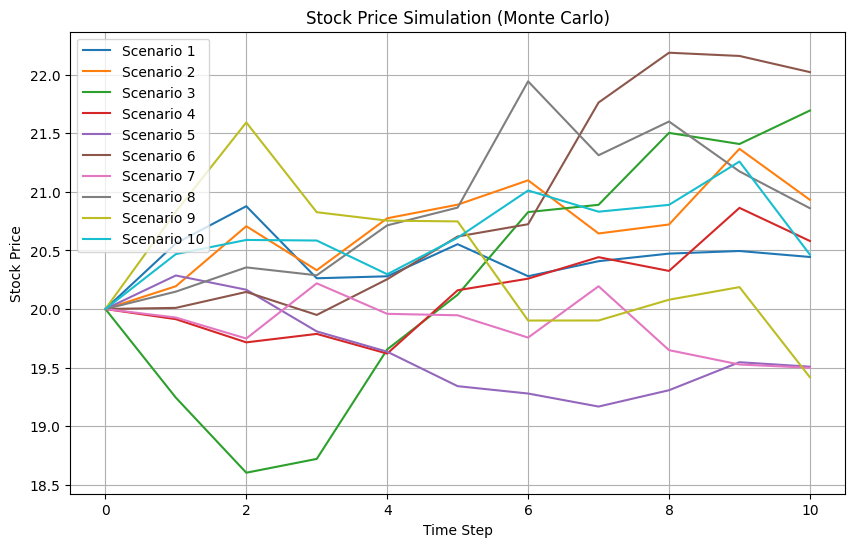

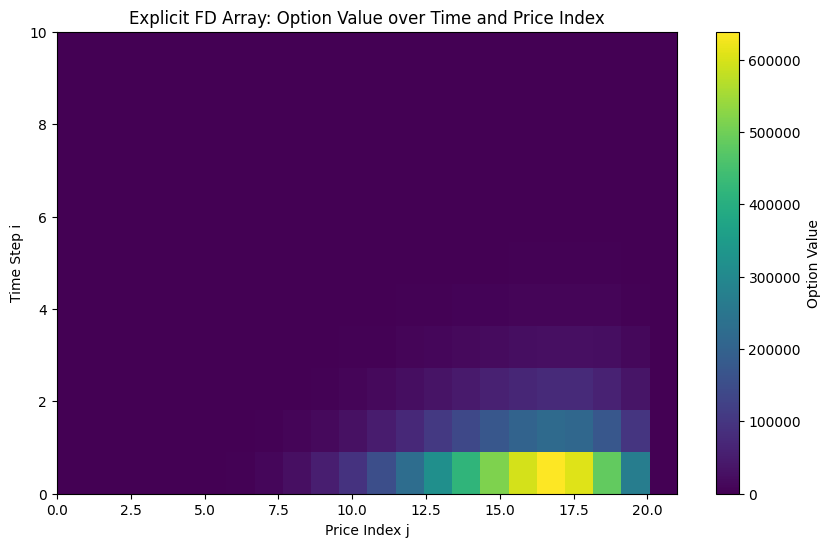

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------
# Parameters
# ---------------------------------------------
np.set_printoptions(precision=5)
np.random.seed(10)

NbScenarios = 1000
K  = 21
S0 = 20
r  = 0.12
T  = 0.1
m  = 10   # time steps
n  = 10   # underlying steps
dt = T / m
dS = 2
D  = 1 / (1 + r * dt)

# ---------------------------------------------
# Arrays for the FD approach
# f[i,j]   i in 0..m, j in 0..2n+1
# ---------------------------------------------
f = np.zeros((m + 1, 2*n + 2))
a = np.zeros(2*n + 2)
b = np.zeros(2*n + 2)
c = np.zeros(2*n + 2)

# ---------------------------------------------
# Final Payoff at maturity (i = m)
# We'll fill for j=0..2n+1
# ---------------------------------------------
for j in range(2*n + 2):
    S_j = j * dS
    f[m][j] = max(S_j - K, 0)

    # We are not using sigma in a, b, c here; just set them all = D
    # (Your code does this, but note it's not a real PDE derivation.)
    a[j] = D
    b[j] = D
    c[j] = D

# ---------------------------------------------
# Explicit FD: step back from i=m-1 to i=0
# We skip j=0 and j=2n+1 in the "inner" loop
# to avoid out-of-range (j-1 < 0, j+1 > 2n+1).
# Then we set boundary conditions at j=0, j=2n+1 explicitly.
# ---------------------------------------------
for i in range(m - 1, -1, -1):

    # Boundary condition at j=0 for a call -> 0
    f[i][0] = 0.0

    # Boundary condition at j=2n+1 for a call -> S_{max} - K (rough)
    # Realistically you'd do something like: S_{max} - K*exp(-r*(T - t_i)), but let's keep it simple
    f[i][2*n + 1] = (2*n + 1)*dS - K

    # Now do the interior j=1..2n
    for j in range(1, 2*n + 1):
        # Next-step values: f[i+1][j-1], f[i+1][j], f[i+1][j+1]
        f[i][j] = (
            a[j] * f[i + 1][j - 1] +
            b[j] * f[i + 1][j]     +
            c[j] * f[i + 1][j + 1]
        )

# Print the FD price near S0
j0 = int(S0 // dS)  # integer index for S0
print("FD-based price near S0:", f[0][j0])

# ---------------------------------------------
# Monte Carlo
# ---------------------------------------------
NbScenarios = 1000
S = np.zeros((m + 1, NbScenarios))
Vest = 0.0

for scenario in range(NbScenarios):
    S[0][scenario] = S0
    for i in range(1, m + 1):
        # Using a fixed local-vol expression at j=10 for demonstration.
        # (In a real local-vol MC, you'd compute sigma = 0.2*(1+exp(-0.5*S[i-1][scenario])) or similar.)
        sigma = 0.2 * (1 + math.exp(-0.5 * 10 * dS))
        z = np.random.normal()
        S[i][scenario] = S[i - 1][scenario] * math.exp(
            (r - 0.5 * sigma**2) * dt + sigma * math.sqrt(dt) * z
        )
    Vest += max(S[m][scenario] - K, 0.0)

Vest /= NbScenarios
print("Monte Carlo average payoff:", Vest)

# ---------------------------------------------
# Visualization 1: Plot some Monte Carlo paths
# ---------------------------------------------
plt.figure(figsize=(10, 6))
for i in range(min(NbScenarios, 10)):  # Plot a limited number of scenarios
    plt.plot(S[:, i], label=f"Scenario {i+1}")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.title("Stock Price Simulation (Monte Carlo)")
plt.grid(True)
plt.legend()
plt.show()

# ---------------------------------------------
# Visualization 2: Plot the FD array as a heatmap
# f[i,j], i on the vertical, j on the horizontal
# We'll put time (i) on the y-axis, price index (j) on the x-axis
# ---------------------------------------------
plt.figure(figsize=(10, 6))
plt.imshow(
    f,
    cmap='viridis',
    origin='lower',
    aspect='auto',
    extent=[0, 2*n + 1, 0, m]
)
plt.colorbar(label='Option Value')
plt.xlabel('Price Index j')
plt.ylabel('Time Step i')
plt.title('Explicit FD Array: Option Value over Time and Price Index')
plt.show()


Explicit FD Price at t=0, S0=20.0: 0.2602
Monte Carlo Price (Euler), with 100000 paths: 0.2225

Comparison:
  FD  Price = 0.2602
  MC  Price = 0.2225


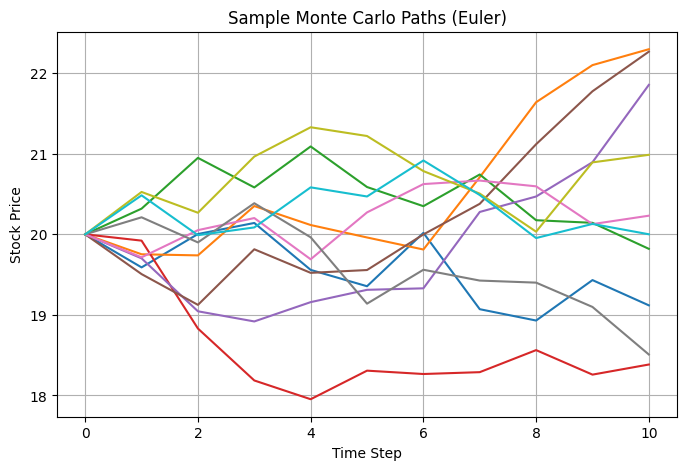

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

# ---------------
# PARAMETERS
# ---------------
S0 = 20.0     # initial stock price
K  = 21.0     # strike
r  = 0.12     # risk-free rate
T  = 0.1      # time to maturity (years)
sigma = 0.2   # constant volatility

m  = 10       # number of time steps in FD
n  = 10       # half the number of price steps in FD
dS = 2.0      # spacing in stock-price grid

dt = T / m
Jmax = 2*n + 1  # so indices go 0..Jmax (that’s 2n+2 points)
Smax = dS * Jmax

# For Monte Carlo:
NbScenarios = 100_000  # set large for a stable average
np.random.seed(123)

# ------------------------------------------
# 1) EXPLICIT FINITE DIFFERENCE APPROACH
# ------------------------------------------
# f[i,j]: i in 0..m (time steps), j in 0..Jmax (price steps)
f = np.zeros((m+1, Jmax+1))

# Final payoff at maturity i=m
for j in range(Jmax+1):
    Sj = j * dS
    f[m, j] = max(Sj - K, 0)  # call payoff

# We define standard explicit coefficients for the PDE:
# Black–Scholes PDE: df/dt + 0.5*sigma^2*S^2*d^2f/dS^2 + r*S*df/dS - r*f=0
# Discretized indices: S_j = j*dS
# A typical explicit scheme for each interior j=1..Jmax-1:
#   f[i,j] = a_j*f[i+1,j-1] + b_j*f[i+1,j] + c_j*f[i+1,j+1]
# with:
#   a_j = 0.5 * sigma^2 * j^2 * dt - 0.5*r*j*dt
#   b_j = 1 - sigma^2*j^2*dt - r*dt
#   c_j = 0.5 * sigma^2 * j^2 * dt + 0.5*r*j*dt
# Often we discount each step by e^{-r dt}, but let's keep it simple here.

a = np.zeros(Jmax+1)
b = np.zeros(Jmax+1)
c = np.zeros(Jmax+1)

for j in range(Jmax+1):
    # dimensionless j for sigma^2 * j^2
    aj = 0.5 * sigma**2 * j**2 * dt - 0.5*r*j*dt
    bj = 1.0 - sigma**2 * j**2 * dt - r*dt
    cj = 0.5 * sigma**2 * j**2 * dt + 0.5*r*j*dt
    a[j], b[j], c[j] = aj, bj, cj

# Step backward in time
for i in range(m-1, -1, -1):
    # boundary condition j=0 => call value ~ 0
    f[i, 0] = 0.0
    # boundary j=Jmax => approximate S-K
    f[i, Jmax] = (Jmax*dS - K) * math.exp(-r * (T - i*dt))  # simple approach
    for j in range(1, Jmax):
        f[i, j] = a[j]*f[i+1, j-1] + b[j]*f[i+1, j] + c[j]*f[i+1, j+1]

# The FD price at S0 ~ j0
j0 = int(S0 // dS)
# (Optional) linear interpolation if you'd like:
# alpha = (S0 - j0*dS)/dS
# FD_price = (1 - alpha)*f[0,j0] + alpha*f[0,j0+1]
FD_price = f[0, j0]

print(f"Explicit FD Price at t=0, S0={S0}: {FD_price:.4f}")


# ------------------------------------------
# 2) MONTE CARLO via EULER–MARUYAMA
# ------------------------------------------
# We'll simulate S(t) under risk-neutral drift r, volatility sigma (constant).
# For local-vol, you'd do sigma(S) in the step below.

dt_mc = T / m  # same # of steps as FD if you want
S_paths = np.zeros((m+1, NbScenarios))
S_paths[0,:] = S0

for scn in range(NbScenarios):
    for i in range(m):
        S_curr = S_paths[i, scn]
        Z = np.random.normal()
        # Euler step: S_{i+1} = S_i + r*S_i*dt_mc + sigma*S_i*sqrt(dt_mc)*Z
        # Alternatively, if we do geometric Brownian motion exactly:
        # S_{i+1} = S_i * exp((r - 0.5*sigma^2)*dt_mc + sigma*sqrt(dt_mc)*Z)
        dS_ = r*S_curr*dt_mc + sigma*S_curr*math.sqrt(dt_mc)*Z
        S_paths[i+1, scn] = S_curr + dS_

# Compute payoff = max(S(T)-K,0), then discount
payoffs = np.maximum(S_paths[m,:] - K, 0.0)
MC_price = math.exp(-r*T) * np.mean(payoffs)

print(f"Monte Carlo Price (Euler), with {NbScenarios} paths: {MC_price:.4f}")


# ------------------------------------------
# 3) Compare & Print
# ------------------------------------------
print("\nComparison:")
print(f"  FD  Price = {FD_price:.4f}")
print(f"  MC  Price = {MC_price:.4f}")


# ------------------------------------------
# 4) (Optional) Visualization
# ------------------------------------------
# Let's just plot a few MC paths:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for i in range(min(NbScenarios, 10)):
    plt.plot(S_paths[:,i])
plt.title("Sample Monte Carlo Paths (Euler)")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()


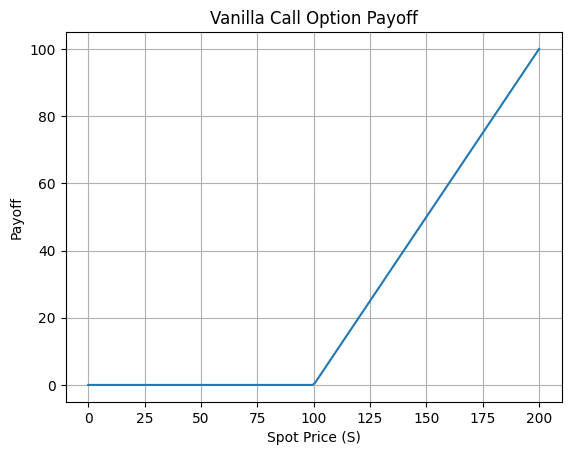

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 100  # Strike price
S = np.linspace(0, 200, 200)  # Range of possible spot prices

# Vanilla call payoff
call_payoff = np.maximum(S - K, 0)

# Plot
plt.plot(S, call_payoff)
plt.title("Vanilla Call Option Payoff")
plt.xlabel("Spot Price (S)")
plt.ylabel("Payoff")
plt.grid(True)
plt.show()
